# British Car Accident Severity Analysis
#### (Note: this project is in progress)
-----
## Introduction
- This is a redo project of CS 377 (Applied Data Analysis). In my original project, I used pandas dataframe, decision trees, etc., which turned out to be confusing when I tried to curve the ROCs. The predictions weren't going well. Later, I realized that because spatial data were plotted districts by districts, and vehicles were on roads instead of random locations, so it was inappropriate to use longitude and latitude without any data engineering. 
- However, this dataset was valuable and worth analyzing because it was not synthetic and contained lots of real-world details. Thus, after learning some Geo-Python and GIS, I decided to remade my project here, using geopandas and some mapping.
- This project may go a bit slow because I just started learning GIS since the middle of January. It's still in progress. Sorry for any inconvenience.

### Data Source
- Data Source: [UK Road Traffic Collision Dataset](https://www.kaggle.com/datasets/salmankhaliq22/road-traffic-collision-dataset/data?select=vehicle_data.csv), Kaggle (click to view the data)
- Original Data Source: British Government

## Data Processing

In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

C:\Users\Flora\AppData\Local\Temp\ipykernel_14708\851790402.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
accident_URL = "https://media.githubusercontent.com/media/weifanz/CS-377-Applied-Data-Analysis-Course-Projects/main/Multiclass%20Classification%20--%20Car%20Accidents/accident_data.csv"
vehicle_URL = "https://media.githubusercontent.com/media/weifanz/CS-377-Applied-Data-Analysis-Course-Projects/main/Multiclass%20Classification%20--%20Car%20Accidents/vehicle_data.csv"

accident_data = pd.read_csv(accident_URL, encoding = 'latin1')
vehicle_data = pd.read_csv(vehicle_URL, encoding = 'latin1')


### Make Dataframe into Geo Dataframe

In [3]:
# See if the dataframe has unique values
accident_data.columns.unique()

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [4]:
# Since there is longtitude and latitude, convert that to geo dataframe
accident_data = gpd.GeoDataFrame(
    accident_data, geometry=gpd.points_from_xy(accident_data.Longitude, accident_data.Latitude), crs="EPSG:4326"
)

accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,geometry
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04/01/2005,Tuesday,1.0,...,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No,POINT (-0.19117 51.48910)
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,...,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No,POINT (-0.21171 51.52007)
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,...,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No,POINT (-0.20646 51.52530)
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,...,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No,POINT (-0.17386 51.48244)
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,...,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No,POINT (-0.15662 51.49575)


In [5]:
# Check if vehicle data has longtitude and latitude
vehicle_data.columns.unique()

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact', 'Year'],
      dtype='object')

In [6]:
# Since there's no longtitude and latudude, don't convert it
vehicle_data.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


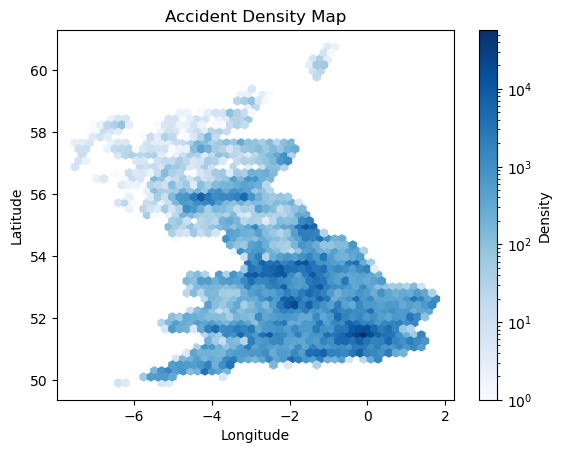

In [19]:
# Plot the accident map
plt.hexbin(accident_data["Longitude"], 
           accident_data["Latitude"], 
           gridsize=50, 
           cmap="Blues",
           bins="log")

plt.colorbar(label="Density")
# Setting labels for axes
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a title for the plot
plt.title("Accident Density Map")

plt.show()

## (To be continued...)